# EmotionalAI: Baseline Modeling

Analysis by Frank Flavell

# Modeling

After addressing the class imbalance, I trained several models using the updated dataset.

### Target
* Emotion: 0: No emotion, 1: Anger, 2: Disgust, 3: Fear, 4: Happiness, 5: Sadness, 6: Surprise


## Table of Contents<span id="0"></span>

1. [**Train/ Test Split**](#1)
<br/><br/>
2. [**Logistic Regression**](#2)
<br/><br/>
3. [**Naive Bayes**](#3)
<br/><br/>
4. [**Support Vector Machine**](#4)
<br/><br/>
5. [**Random Forest**](#5)
<br/><br/>
6. [**Evaluation & Findings**](#6)
    * Class Imbalance
    * Feature Engineering
<br/><br/>
7. [**In-Notebook Demo**](#6)

# Package Import

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Pre-Processing
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer

#Train/Test Split
from sklearn.model_selection import train_test_split

#Modeling Processing Pipeline
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

#Evaluation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

# Data Import and Review

In [109]:
df = pd.read_pickle('data/dialogue_master.pickle')

In [110]:
df.head()

,dialogue,topic,emotion,type
0,the kitchen stinks.,1,2,3
1,i will throw out the garbage.,1,0,4
2,"so dick, how about getting some coffee for ton...",1,4,3
3,coffee? i do not honestly like that kind of st...,1,2,4
4,"come on, you can at least try a little, beside...",1,0,3


In [111]:
df.shape

(102980, 4)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102980 entries, 0 to 102979
Data columns (total 4 columns):
dialogue    102980 non-null object
topic       102980 non-null int64
emotion     102980 non-null int64
type        102980 non-null int64
dtypes: int64(3), object(1)
memory usage: 3.1+ MB


# <span id="1"></span>1. Train/ Test Split
#### [Return Contents](#0)

In [114]:
X = df.dialogue
y = df.emotion
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)

In [115]:
emotions = ['No emotion', 'Anger', 'Disgust', 'Fear', 'Happiness', 'Sadness', 'Surprise']

# <span id="2"></span>2. Logistic Regression Baseline
#### [Return Contents](#0)

In [123]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
# INSERT VECTORIZER INSTEAD
from sklearn.metrics import classification_report
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

In [124]:
logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(X_train, y_train)


y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=emotions))

accuracy 0.8474655272868518
              precision    recall  f1-score   support

  No emotion       0.88      0.95      0.91     21424
       Anger       0.46      0.16      0.24       259
     Disgust       0.40      0.18      0.25        79
        Fear       0.40      0.04      0.08        46
   Happiness       0.59      0.39      0.47      3259
     Sadness       0.30      0.14      0.19       259
    Surprise       0.50      0.27      0.35       419

    accuracy                           0.85     25745
   macro avg       0.50      0.30      0.36     25745
weighted avg       0.82      0.85      0.83     25745



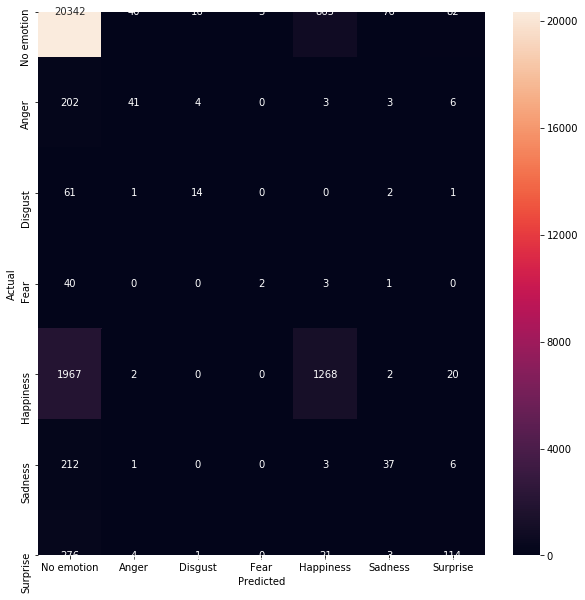

In [125]:
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=emotions, yticklabels=emotions)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# <span id="3"></span>3. Naive Bayes Baseline
#### [Return Contents](#0)

In [119]:
nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=emotions))

accuracy 0.8377937463585162
              precision    recall  f1-score   support

  No emotion       0.84      1.00      0.91     21424
       Anger       0.00      0.00      0.00       259
     Disgust       0.00      0.00      0.00        79
        Fear       0.00      0.00      0.00        46
   Happiness       0.78      0.06      0.11      3259
     Sadness       0.00      0.00      0.00       259
    Surprise       0.00      0.00      0.00       419

    accuracy                           0.84     25745
   macro avg       0.23      0.15      0.15     25745
weighted avg       0.80      0.84      0.77     25745



# <span id="4"></span>4. Support Vector Machine
#### [Return Contents](#0)

In [121]:
sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)

y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=emotions))

accuracy 0.8363177315983686
              precision    recall  f1-score   support

  No emotion       0.84      0.99      0.91     21424
       Anger       0.00      0.00      0.00       259
     Disgust       0.00      0.00      0.00        79
        Fear       0.00      0.00      0.00        46
   Happiness       0.63      0.08      0.14      3259
     Sadness       0.00      0.00      0.00       259
    Surprise       0.00      0.00      0.00       419

    accuracy                           0.84     25745
   macro avg       0.21      0.15      0.15     25745
weighted avg       0.78      0.84      0.78     25745



# <span id="5"></span>5. Random Forest Baseline
#### [Return Contents](#0)

In [122]:
rdf = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', RandomForestClassifier(n_estimators=100, max_depth= 5)),
               ])
rdf.fit(X_train, y_train)

y_pred = rdf.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=emotions))

accuracy 0.8321615847737425
              precision    recall  f1-score   support

  No emotion       0.83      1.00      0.91     21424
       Anger       0.00      0.00      0.00       259
     Disgust       0.00      0.00      0.00        79
        Fear       0.00      0.00      0.00        46
   Happiness       0.00      0.00      0.00      3259
     Sadness       0.00      0.00      0.00       259
    Surprise       0.00      0.00      0.00       419

    accuracy                           0.83     25745
   macro avg       0.12      0.14      0.13     25745
weighted avg       0.69      0.83      0.76     25745



# <span id="6"></span>6. Evaluation & Findings
#### [Return Contents](#0)

#### Evaluation



#### Findings



# <span id="7"></span>7. In-Notebook Demo
#### [Return Contents](#0)

Build a function that takes in a string and outputs a prediction in the form of a string and an image. Also requests user validation for classification.  If correct, output appropriate response.  If incorrect, ask user to correctly classify the message.

In [1]:
def emotion_ai(message):
    #message preprocessing
    #message predictions with trained model
    #Align string and image outputs with prediction
    #return outputs

SyntaxError: unexpected EOF while parsing (<ipython-input-1-3e0d66e4e75d>, line 5)

In [ ]:
message = input("Hi!  How're you feeling today?")
emotion_ai(message)
